## Exam: Data analytics using Python



### Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Importing the Data set



In [3]:
pets= pd.read_csv("train.csv")

In [4]:
pets.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


Ho: Adoption Speed depends on the other parameters

In [20]:
pets.shape

(14981, 24)

There are 24 columns and 14993 rows in the data set

In [6]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

There are no null values in our data except for the name column

In [11]:
round(100*(pets.isnull().sum()/len(pets.index)), 2)

Type             0.00
Name             8.38
Age              0.00
Breed1           0.00
Breed2           0.00
Gender           0.00
Color1           0.00
Color2           0.00
Color3           0.00
MaturitySize     0.00
FurLength        0.00
Vaccinated       0.00
Dewormed         0.00
Sterilized       0.00
Health           0.00
Quantity         0.00
Fee              0.00
State            0.00
RescuerID        0.00
VideoAmt         0.00
Description      0.08
PetID            0.00
PhotoAmt         0.00
AdoptionSpeed    0.00
dtype: float64

In [12]:
pets["Name"].mode()

0    Baby
dtype: object

Since the maximum times entered value is "baby", we replace all the values by it. Since only 0.08 percent of the values in despcription are null, so we can drop these rows

In [4]:
pets['Name'].fillna(value="Baby",inplace=True)

In [5]:
pets= pets.dropna(axis=0)

In [21]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14981 entries, 0 to 14992
Data columns (total 24 columns):
Type             14981 non-null int64
Name             14981 non-null object
Age              14981 non-null int64
Breed1           14981 non-null int64
Breed2           14981 non-null int64
Gender           14981 non-null int64
Color1           14981 non-null int64
Color2           14981 non-null int64
Color3           14981 non-null int64
MaturitySize     14981 non-null int64
FurLength        14981 non-null int64
Vaccinated       14981 non-null int64
Dewormed         14981 non-null int64
Sterilized       14981 non-null int64
Health           14981 non-null int64
Quantity         14981 non-null int64
Fee              14981 non-null int64
State            14981 non-null int64
RescuerID        14981 non-null object
VideoAmt         14981 non-null int64
Description      14981 non-null object
PetID            14981 non-null object
PhotoAmt         14981 non-null float64
AdoptionSpe

Now, we have removed all the Null values

In [23]:
pets.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,14981.0,1.457379,0.498197,1.0,1.0,1.0,2.0,2.0
Age,14981.0,10.448301,18.150898,0.0,2.0,3.0,11.0,255.0
Breed1,14981.0,265.270543,60.063415,0.0,265.0,266.0,307.0,307.0
Breed2,14981.0,74.013083,123.012891,0.0,0.0,0.0,179.0,307.0
Gender,14981.0,1.776383,0.681575,1.0,1.0,2.0,2.0,3.0
Color1,14981.0,2.234430,1.745578,1.0,1.0,2.0,3.0,7.0
Color2,14981.0,3.221681,2.742033,0.0,0.0,2.0,6.0,7.0
Color3,14981.0,1.883052,2.984552,0.0,0.0,0.0,5.0,7.0
MaturitySize,14981.0,1.861825,0.547721,1.0,2.0,2.0,2.0,4.0
FurLength,14981.0,1.467459,0.599030,1.0,1.0,1.0,2.0,3.0


## Univariate Analysis

## Categorical variables

In [59]:
pets["AdoptionSpeed"].value_counts()

4    4193
2    4032
3    3258
1    3088
0     410
Name: AdoptionSpeed, dtype: int64

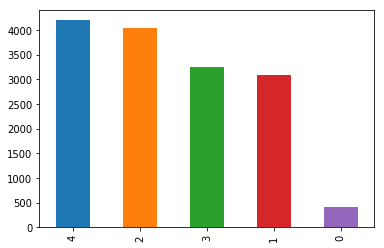

In [41]:
pets["AdoptionSpeed"].value_counts().plot.bar()

Here we see, most of the pets are adopted after 90 days(cateory 4) and adopted in 1-7 days(category 2)

In [43]:
pets["Type"].value_counts()

1    8129
2    6852
Name: Type, dtype: int64

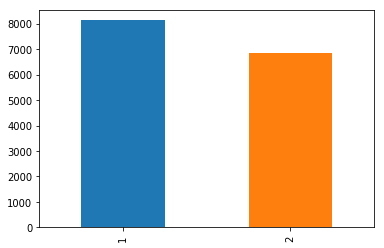

In [42]:
pets["Type"].value_counts().plot.bar()

More dogs(1) are adopted in comparison to cats(2)

In [77]:
pets["Gender"].value_counts()

2    7273
1    5529
3    2179
Name: Gender, dtype: int64

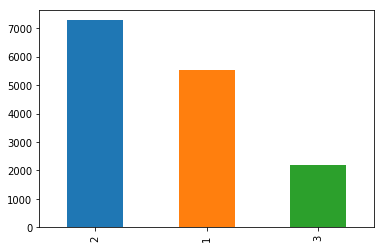

In [78]:
pets["Gender"].value_counts().plot.bar()

Most of the pets were female(2). Very less amount of mixed(3) gender pets were there

In [27]:
pets["Color1"].value_counts()

1    7421
2    3747
3     945
5     883
6     684
7     667
4     634
Name: Color1, dtype: int64

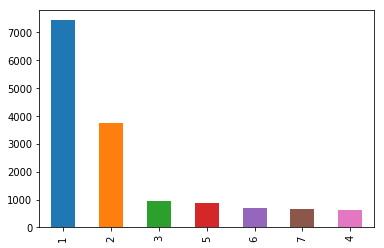

In [44]:
pets["Color1"].value_counts().plot.bar()

Color1 1,ie, Black was most common in all the pets

In [28]:
pets["Color2"].value_counts()

0    4468
7    3432
2    3312
5    1128
6    1061
4     870
3     710
Name: Color2, dtype: int64

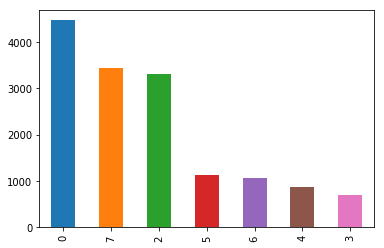

In [45]:
pets["Color2"].value_counts().plot.bar()

for color2 categories 0 (highest) that means no secondary color, 7, white and 2, brown were the most in number

In [29]:
pets["Color3"].value_counts()

0    10593
7     3220
5      417
6      378
4      198
3      175
Name: Color3, dtype: int64

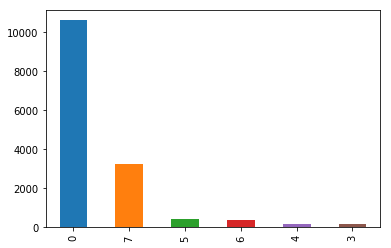

In [46]:
pets["Color3"].value_counts().plot.bar()

in Color3 category 0 which means no third color  was the most common one

In [30]:
pets["MaturitySize"].value_counts()

2    10300
1     3392
3     1256
4       33
Name: MaturitySize, dtype: int64

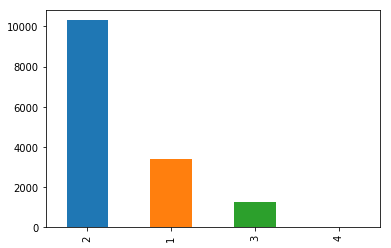

In [47]:
pets["MaturitySize"].value_counts().plot.bar()

Medium sized(2) dogs were the most in number where as extra large(4) dogs were the least in number

In [31]:
pets["FurLength"].value_counts()

1    8801
2    5357
3     823
Name: FurLength, dtype: int64

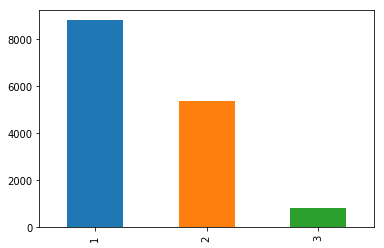

In [48]:
pets["FurLength"].value_counts().plot.bar()

We can see that most dogs were of short(1) fur length and very less dogs were of long(3) fur length

In [32]:
pets["Vaccinated"].value_counts()

2    7223
1    5892
3    1866
Name: Vaccinated, dtype: int64

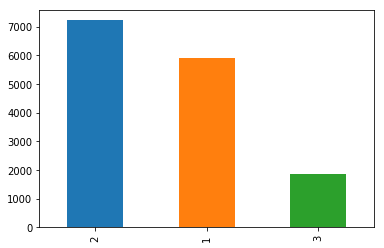

In [49]:
pets["Vaccinated"].value_counts().plot.bar()

A large amount of dogs are not vaccinated(2), and for some amount of dogs it is not sure(3)

In [33]:
pets["Dewormed"].value_counts()

1    8389
2    4813
3    1779
Name: Dewormed, dtype: int64

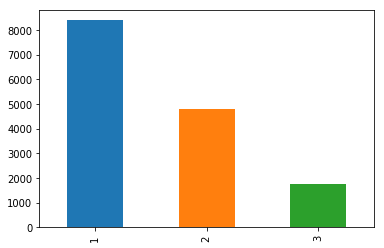

In [50]:
pets["Dewormed"].value_counts().plot.bar()

Most of the pets are dewormed(1), only for it is not sure(3)

In [34]:
pets["Sterilized"].value_counts()

2    10073
1     3097
3     1811
Name: Sterilized, dtype: int64

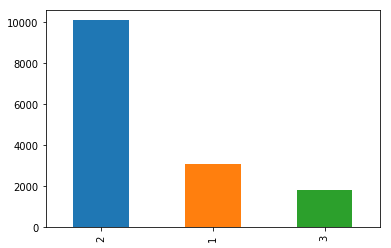

In [51]:
pets["Sterilized"].value_counts().plot.bar()

Most of the pets are not neutered(2) and for a very less amount it is not sure(3) 

In [35]:
pets["Health"].value_counts()

1    14468
2      479
3       34
Name: Health, dtype: int64

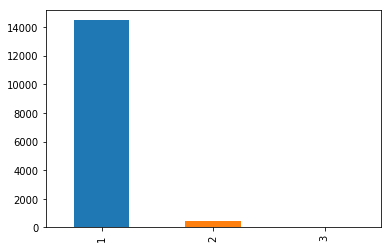

In [52]:
pets["Health"].value_counts().plot.bar()

A large no. of pets are perfectly heathly (1) and very little amount of them is severly injured(3)

In [37]:
pets["State"].value_counts()

41326    8707
41401    3840
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

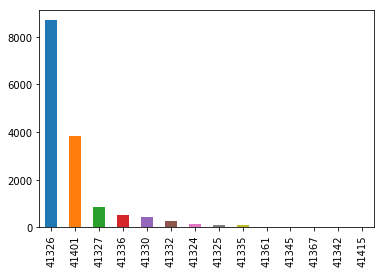

In [53]:
pets["State"].value_counts().plot.bar()

A large amount of pets are from location 41326.
The least amount of pets are prom 41415.

In [38]:
pets["VideoAmt"].value_counts()

0    14407
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: VideoAmt, dtype: int64

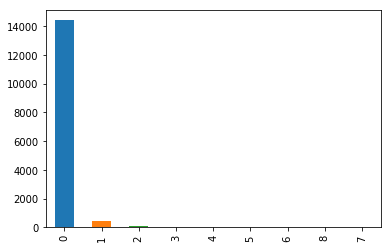

In [55]:
pets["VideoAmt"].value_counts().plot.bar()

Total uploaded videos for most of the pets is 0

In [56]:
pets["PhotoAmt"].value_counts() 

1.0     3072
2.0     2516
3.0     2508
5.0     2146
4.0     1879
6.0      621
7.0      432
0.0      340
8.0      314
9.0      231
10.0     190
11.0     184
12.0      97
13.0      86
14.0      78
15.0      50
16.0      39
17.0      27
20.0      25
19.0      20
30.0      19
18.0      18
21.0      16
24.0      15
23.0      12
26.0      10
22.0       9
25.0       8
28.0       7
27.0       6
29.0       6
Name: PhotoAmt, dtype: int64

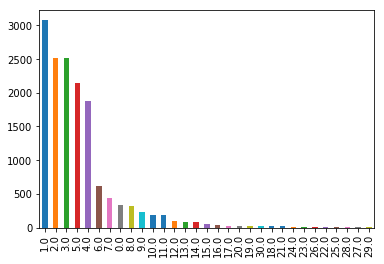

In [72]:
pets["PhotoAmt"].value_counts().plot.bar() 

Most of the pets had atleast one photo of them uploaded.

In [73]:
pets["Quantity"].value_counts()

1     11556
2      1420
3       726
4       530
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
13        2
14        2
18        1
Name: Quantity, dtype: int64

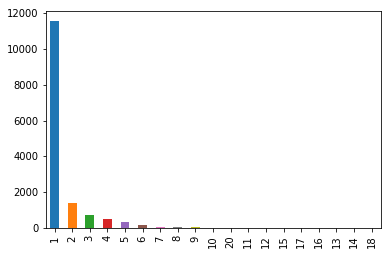

In [74]:
pets["Quantity"].value_counts().plot.bar() 

Most of the pets represented per profile are only 1

### Numerical Variables

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


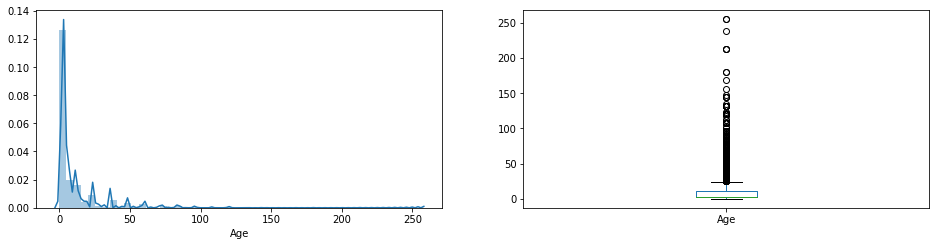

In [61]:
plt.subplot(221)
sns.distplot(pets["Age"])

plt.subplot(222)
pets["Age"].plot.box(figsize = (16,8))

The data is Highly skewed and outliers can be visualized

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


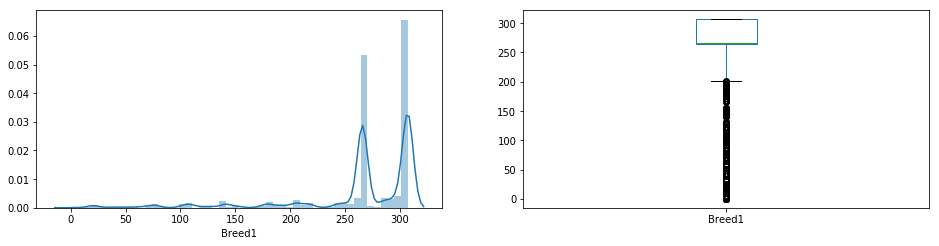

In [65]:
plt.subplot(221)
sns.distplot(pets["Breed1"])

plt.subplot(222)
pets["Breed1"].plot.box(figsize = (16,8))

The data is highly skewed and outliers are toward the right

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


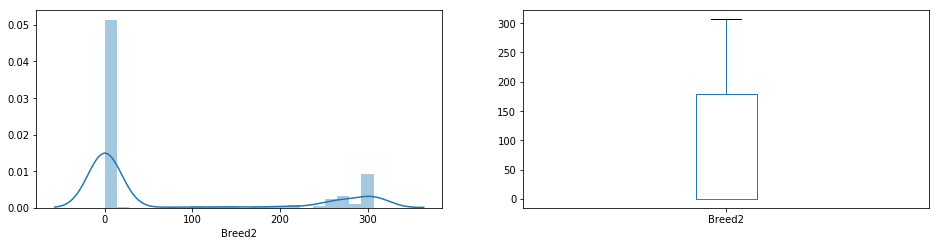

In [68]:
plt.subplot(221)
sns.distplot(pets["Breed2"])

plt.subplot(222)
pets["Breed2"].plot.box(figsize = (16,8))

The data is skewed and there are two places where we get large amount of frequency of the data.

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


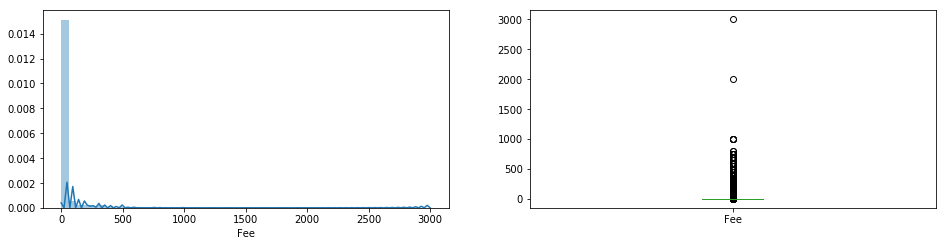

In [75]:
plt.subplot(221)
sns.distplot(pets["Fee"])

plt.subplot(222)
pets["Fee"].plot.box(figsize = (16,8))

The data is highly skewed. Most of the frequency lies toward 0 as in adoption scenarios very less or no fees is charged for the pet

## Bivariate analysis

### categorical vs Target variable

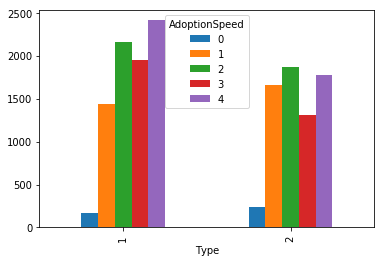

In [81]:
type_as = pd.crosstab(pets["Type"], pets["AdoptionSpeed"])
type_as.plot(kind="bar")

No of Dogs adopted are more than cats. 
In dogs category most of them are adopted after 90 days. But in cats category most of them are adopted in the 1st month

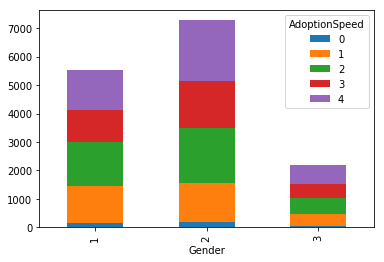

In [83]:
Gender_as = pd.crosstab(pets["Gender"], pets["AdoptionSpeed"])
Gender_as.plot(kind="bar",stacked=True)

Female pets are more in number and most of them are adopted either in the first month or after 90days

Most of the Male pets are adopted in the first month.

Most of the mixed breed dogs ae adopted after 90days

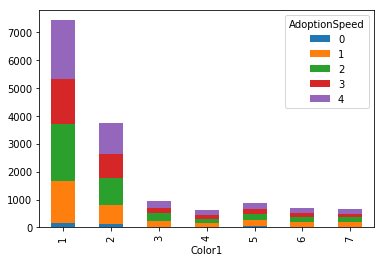

In [84]:
color1_as = pd.crosstab(pets["Color1"], pets["AdoptionSpeed"])
color1_as.plot(kind="bar",stacked=True)

Most of the pets of colour 1 are adopted in first month or after 90 days

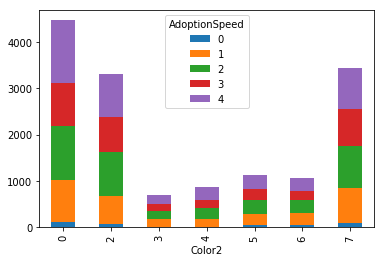

In [85]:
color2_as = pd.crosstab(pets["Color2"], pets["AdoptionSpeed"])
color2_as.plot(kind="bar",stacked=True)

Pets which have secondary colour as 0 are adopted after 90 days

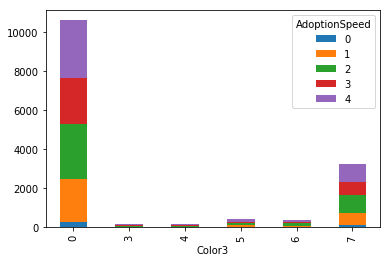

In [86]:
color3_as = pd.crosstab(pets["Color3"], pets["AdoptionSpeed"])
color3_as.plot(kind="bar",stacked=True)

Pets which have 0 as their third colour are adopted in the first month or after 90 days

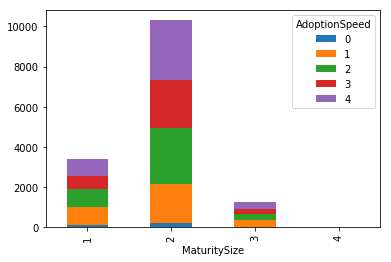

In [87]:
mature = pd.crosstab(pets["MaturitySize"], pets["AdoptionSpeed"])
mature.plot(kind="bar",stacked=True)

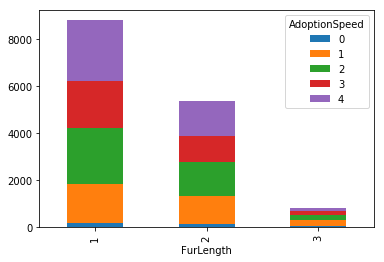

In [88]:
fur_lng = pd.crosstab(pets["FurLength"], pets["AdoptionSpeed"])
fur_lng.plot(kind="bar",stacked=True)

Short fur length dogs are adopted within a month and same can be said for medium fur length dogs.

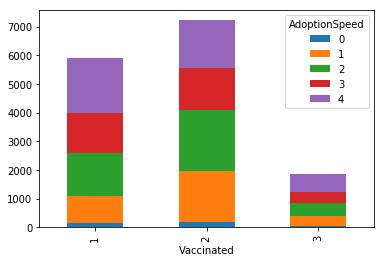

In [89]:
vacc = pd.crosstab(pets["Vaccinated"], pets["AdoptionSpeed"])
vacc.plot(kind="bar",stacked=True)

Pets who are not vaccinated are adopted more and most of them are adopted in a month while Pets who are vaccinated are adopted after 90 days. As the owners obviously will get their pets vaccinated after adopting it doesnt contribute much to the adoption speed

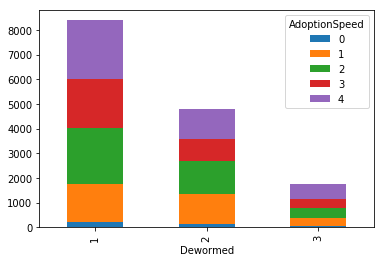

In [102]:
dew = pd.crosstab(pets["Dewormed"], pets["AdoptionSpeed"])
dew.plot(kind="bar",stacked=True)

Pets who are dewormed are adopted more, most of them are adopted in the first month or after 90 days

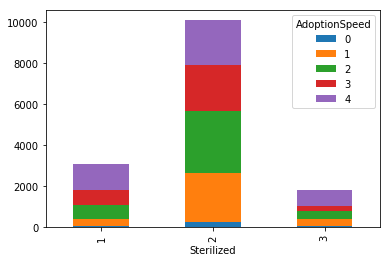

In [92]:
ster = pd.crosstab(pets["Sterilized"], pets["AdoptionSpeed"])
ster.plot(kind="bar",stacked=True)

pets who have not been neutered are adopted more and most of them are adopted in the first month.

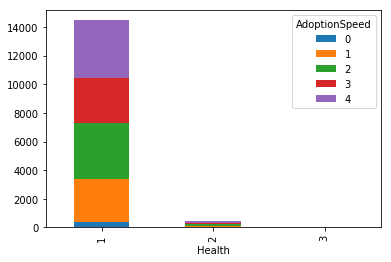

In [93]:
health = pd.crosstab(pets["Health"], pets["AdoptionSpeed"])
health.plot(kind="bar",stacked=True)

Healthy pets are adopted more and most of them are adopted after 90 days

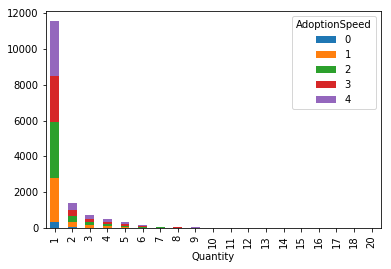

In [94]:
quant = pd.crosstab(pets["Quantity"], pets["AdoptionSpeed"])
quant.plot(kind="bar",stacked=True)

Most of the profiles represent only one pet and are adopted in the first month

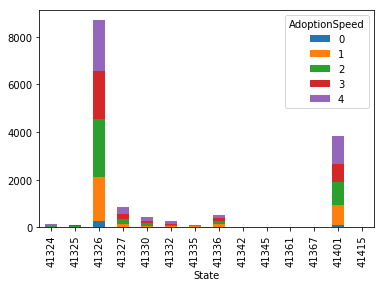

In [95]:
state = pd.crosstab(pets["State"], pets["AdoptionSpeed"])
state.plot(kind="bar",stacked=True)

Most of the pets are adopted from area 41326, all of them have the same no. of pets in each category of adoption speed except for the pet adopted that day itself

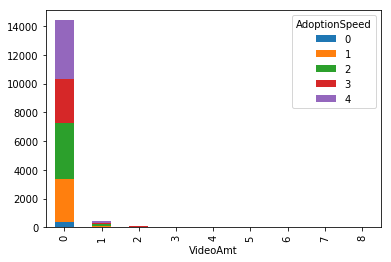

In [96]:
va = pd.crosstab(pets["VideoAmt"], pets["AdoptionSpeed"])
va.plot(kind="bar",stacked=True)

Pets who donot have a video of them uploaded  are mostly adopted. so this variable doesnt depict the adopion speed.

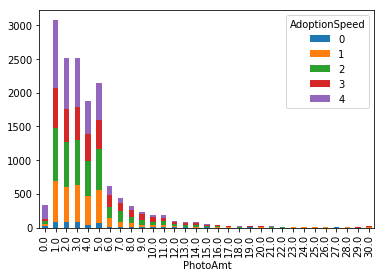

In [97]:
pa = pd.crosstab(pets["PhotoAmt"], pets["AdoptionSpeed"])
pa.plot(kind="bar",stacked=True)

Pets who have only a few amount of pictures uploaded are adopted most of them within a month or after 90 days

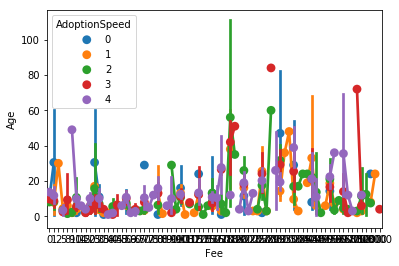

In [21]:
sns.pointplot(pets['Fee'], pets['Age'], hue=pets['AdoptionSpeed'])

In most of the cases less amount of fee is charged irrespective of the age. But there are 2 or 3 cases where high fee is charged when age is less. We can see most of the pets are adopted after 90 days here and their age was less.

In [14]:
df= pets[["Fee", "Breed1", "Breed2","Age","AdoptionSpeed"]]

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


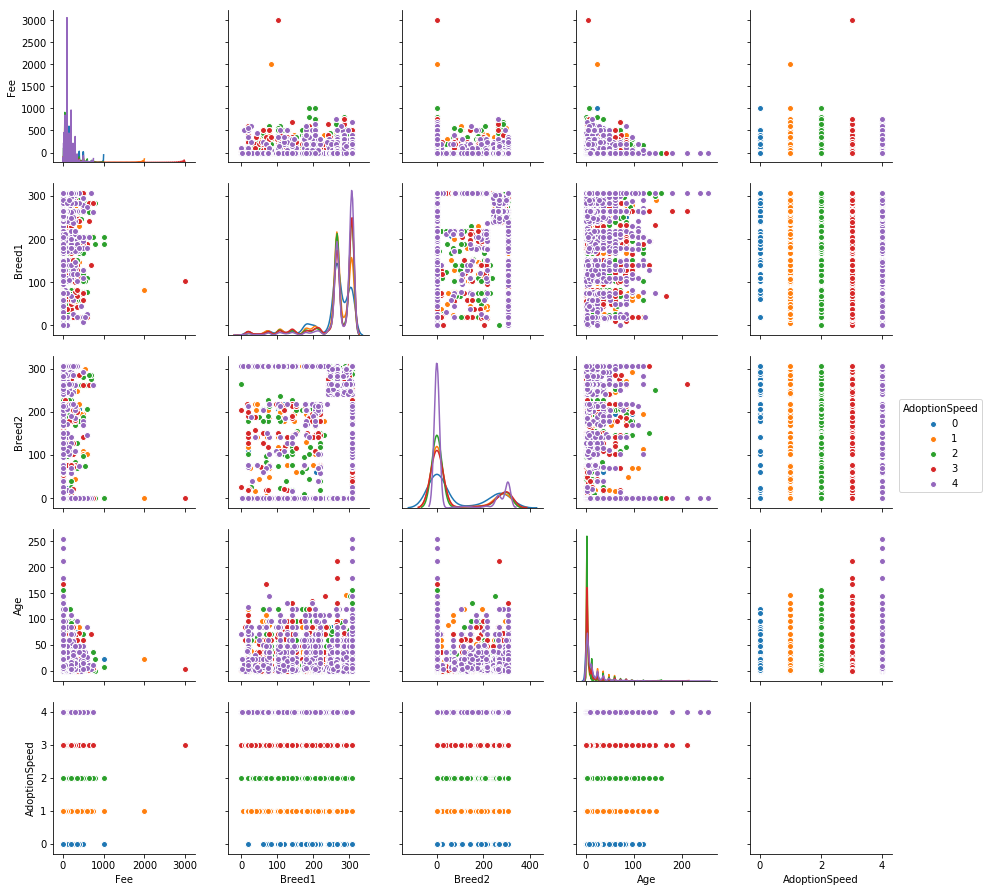

In [15]:
sns.pairplot(df, diag_kind="kde", hue="AdoptionSpeed" )

Most of the Pets are adopted either in a month or after 90 days.

Text(0.5,1,'Correlation between features')

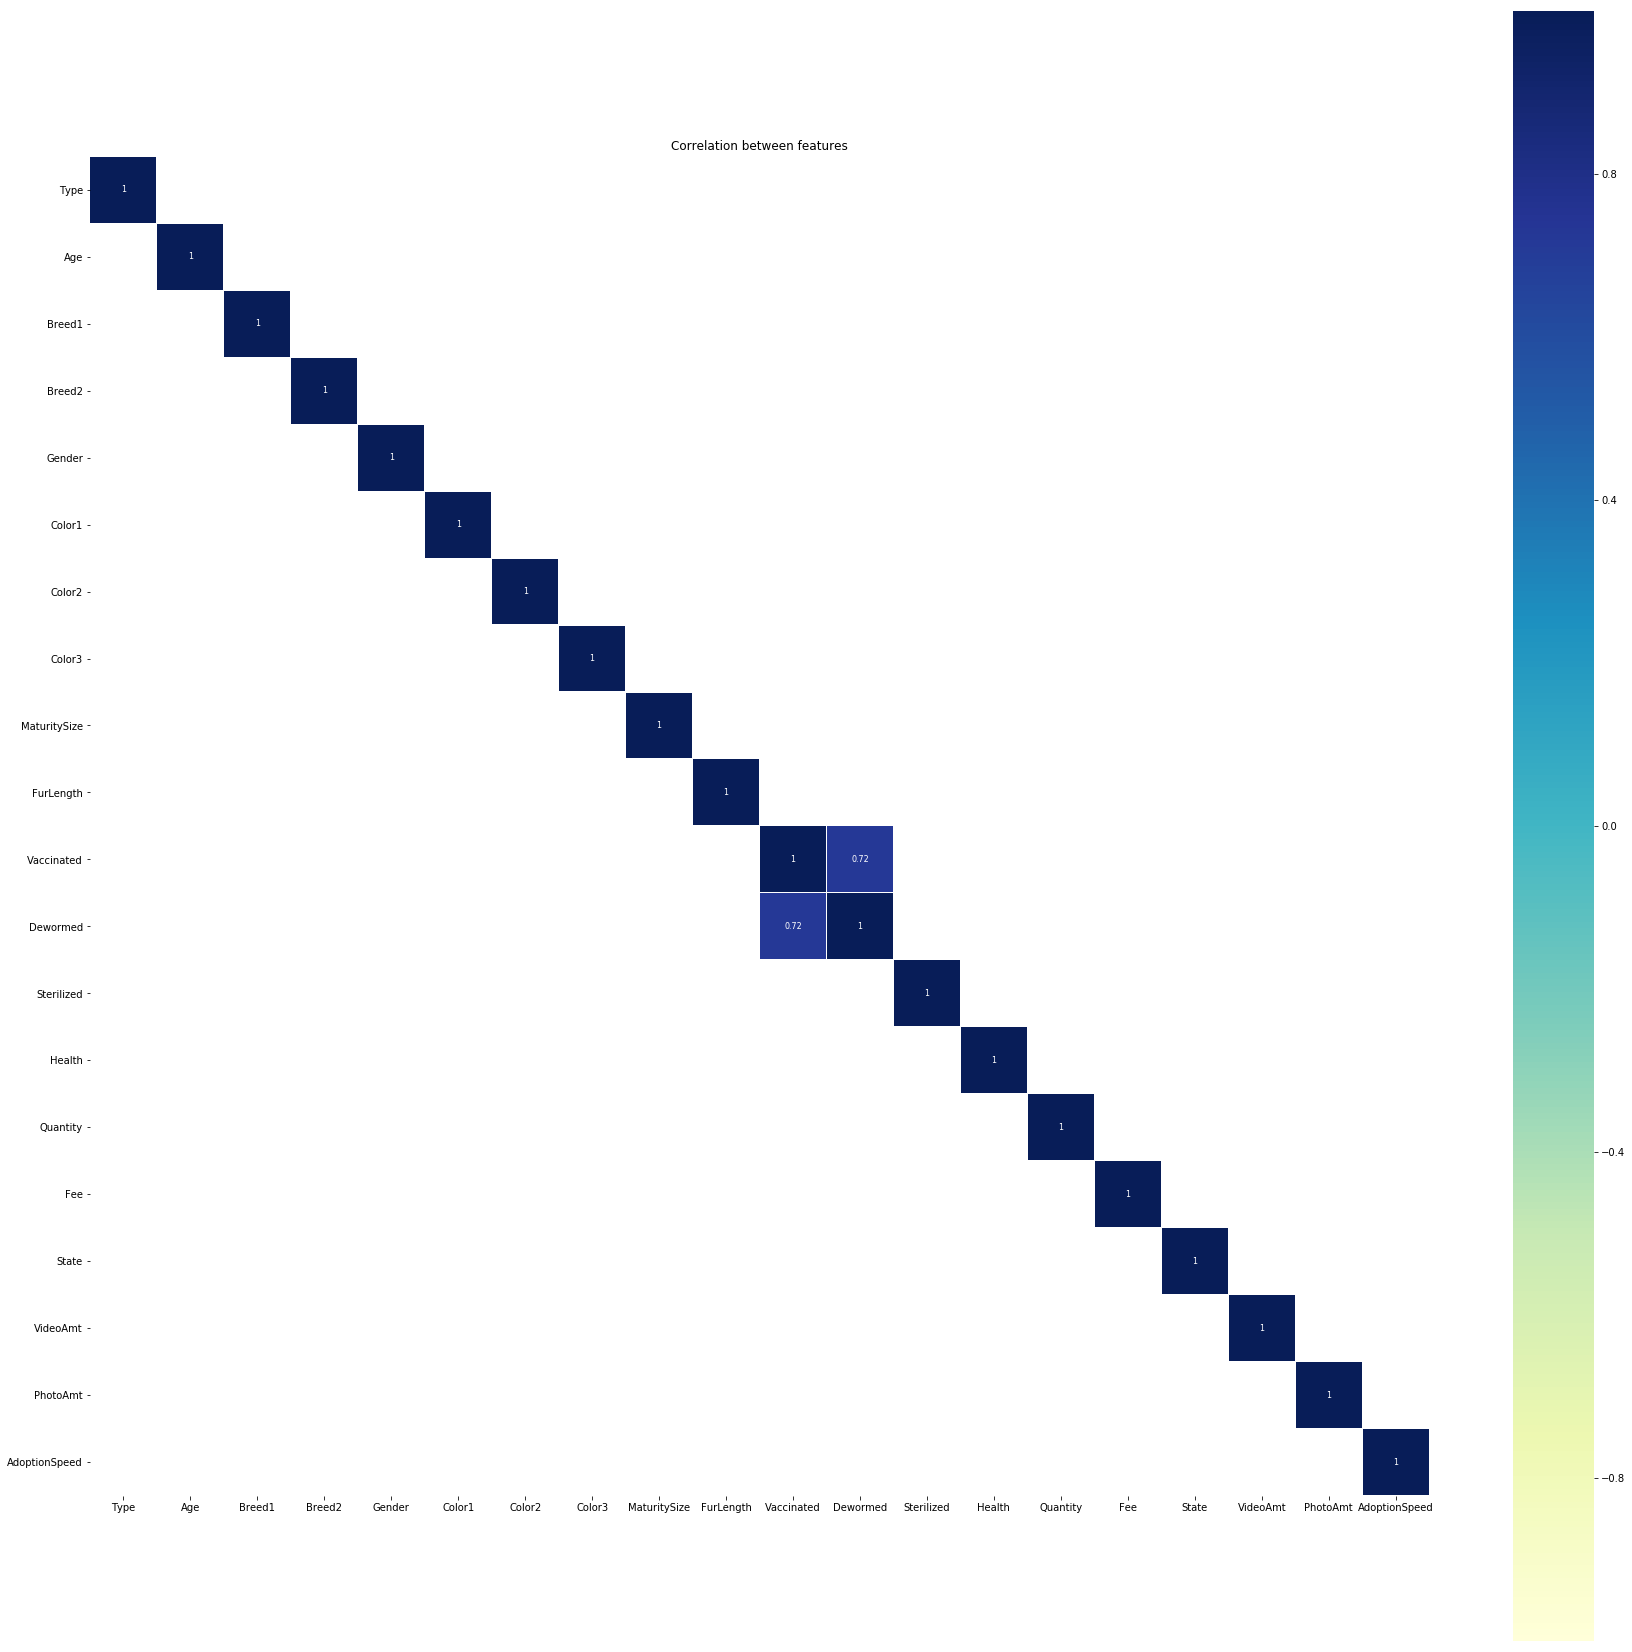

In [11]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=pets.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

Variables in our data are not highly correlated. Only two variables in our data are correlated, that are, Vaccinated and Sterlized.